In [163]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos1 = pd.DataFrame(boston.data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [164]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [165]:
bos.columns = list(boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [166]:
bos['TARGET'] = boston.target

In [167]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Correlation between features

In [168]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Applying Linear Regression without feature engineering

In [169]:
bos1.columns = list(boston.feature_names)
bos1['TARGET'] = boston.target

In [170]:
bos1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [171]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(bos1[['RM','LSTAT']],
                                                    bos1[['TARGET']],test_size=0.2,
                                                    random_state=0)

X_train1.shape, X_test1.shape

((404, 2), (102, 2))

In [172]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler1.fit(X_train1)

# transform train and test sets
X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [173]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [174]:
lr1 = LinearRegression()
lr1.fit(X_train_scaled1,y_train1)

LinearRegression()

In [177]:
y_pred1 = lr1.predict(X_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [178]:
print("R2 score",r2_score(y_test1,y_pred1))

R2 score -24.888445355878083


# Applying Linear Regression after Feature Engineering

#### RM and LSTAT are highly correlated to target 

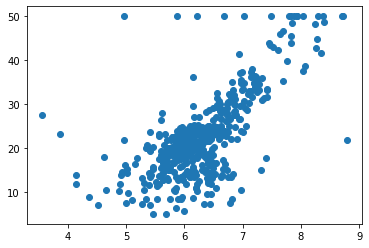

In [129]:
plt.scatter(bos['RM'],bos['TARGET'])

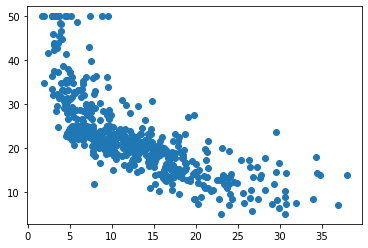

In [130]:
plt.scatter(bos['LSTAT'],bos['TARGET'])

# Plotting to know the distribution of the RM, LSTAT and Target

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


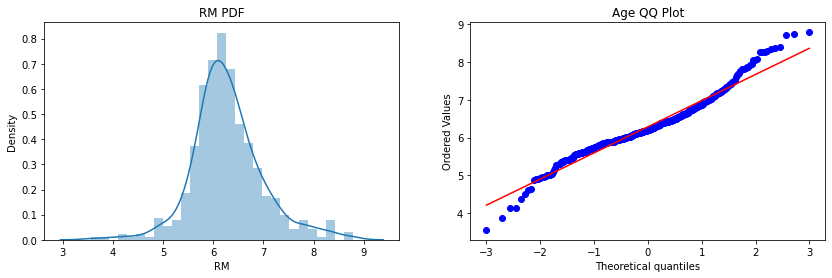

In [131]:
import seaborn as sns

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(bos['RM'])
plt.title('RM PDF')

plt.subplot(122)
stats.probplot(bos['RM'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


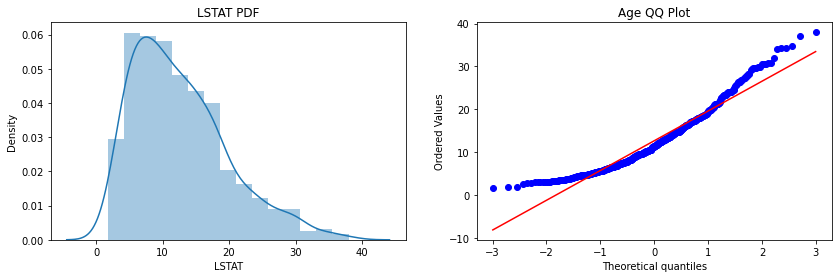

In [132]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(bos['LSTAT'])
plt.title('LSTAT PDF')

plt.subplot(122)
stats.probplot(bos['LSTAT'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


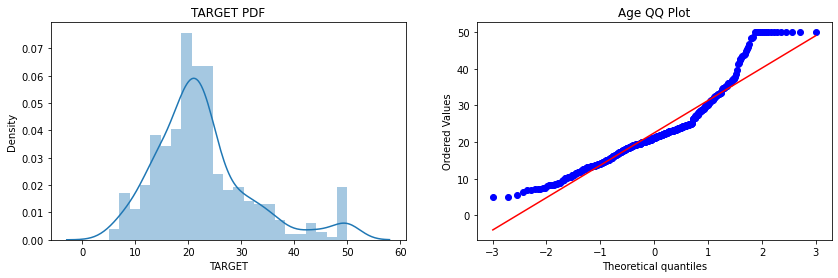

In [179]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(bos['TARGET'])
plt.title('TARGET PDF')

plt.subplot(122)
stats.probplot(bos['TARGET'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

## Using log transformation to convert the right skewed LSTAT to Normal dist.

In [180]:
from sklearn.preprocessing import FunctionTransformer

trf = FunctionTransformer(func=np.log1p)

RM_transformed = trf.fit_transform(bos['RM'])
LSTAT_transformed = trf.transform(bos['LSTAT'])
TARGET_transformed = trf.transform(bos['TARGET'])

## Checking whether any improvement happend or not

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


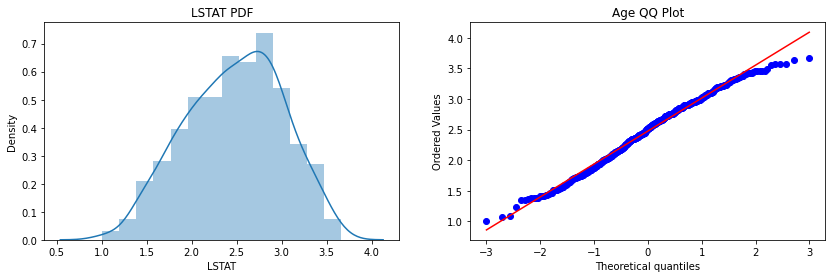

In [134]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(LSTAT_transformed)
plt.title('LSTAT PDF')

plt.subplot(122)
stats.probplot(LSTAT_transformed, dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

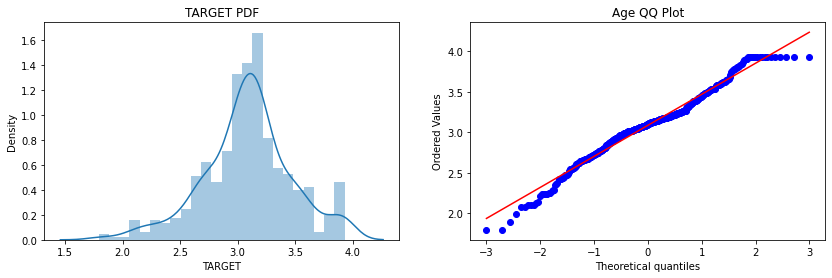

In [185]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(TARGET_transformed)
plt.title('TARGET PDF')

plt.subplot(122)
stats.probplot(TARGET_transformed, dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

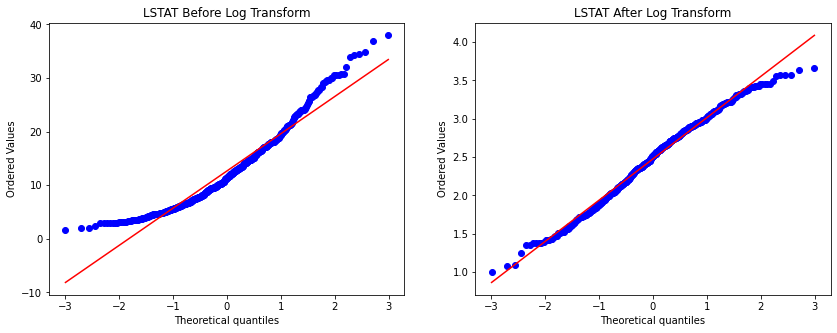

In [135]:
plt.figure(figsize=(14,5))

plt.subplot(121)
stats.probplot(bos['LSTAT'], dist="norm", plot=plt)
plt.title('LSTAT Before Log Transform')

plt.subplot(122)
stats.probplot(LSTAT_transformed, dist="norm", plot=plt)
plt.title('LSTAT After Log Transform')

plt.show()

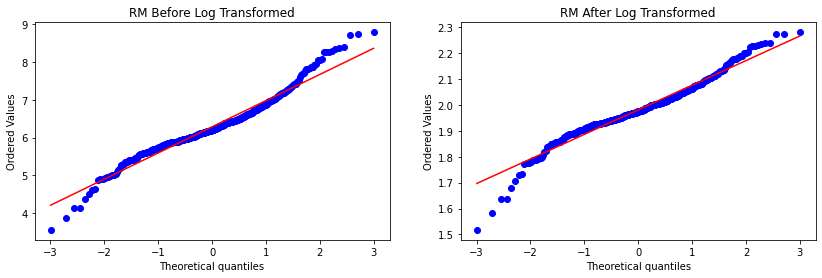

In [136]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(bos['RM'], dist="norm", plot=plt)
plt.title('RM Before Log Transformed')

plt.subplot(122)
stats.probplot(RM_transformed, dist="norm", plot=plt)
plt.title('RM After Log Transformed')

plt.show()

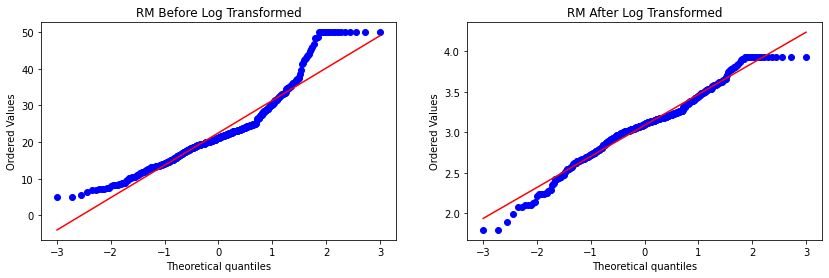

In [186]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(bos['TARGET'], dist="norm", plot=plt)
plt.title('RM Before Log Transformed')

plt.subplot(122)
stats.probplot(TARGET_transformed, dist="norm", plot=plt)
plt.title('RM After Log Transformed')

plt.show()

In [137]:
RM_transformed

0      2.024853
1      2.004314
2      2.102303
3      2.079192
4      2.097650
         ...   
501    2.027227
502    1.962908
503    2.076437
504    2.053354
505    1.950187
Name: RM, Length: 506, dtype: float64

In [138]:
bos.isna().sum() #no null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [139]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Using Z-score outlier detection

In [187]:
# Finding the boundary values
print("Highest allowed",RM_transformed.mean() + 3*RM_transformed.std())
print("Lowest allowed",RM_transformed.mean() - 3*RM_transformed.std())
print('')
print("Highest allowed",LSTAT_transformed.mean() + 3*LSTAT_transformed.std())
print("Lowest allowed",LSTAT_transformed.mean() - 3*LSTAT_transformed.std())
print('')
print("Highest allowed",TARGET_transformed.mean() + 3*TARGET_transformed.std())
print("Lowest allowed",TARGET_transformed.mean() - 3*TARGET_transformed.std())

Highest allowed 2.2706377567074107
Lowest allowed 1.6916407163584206

Highest allowed 4.0927076047478685
Lowest allowed 0.8585119650899073

Highest allowed 4.246333546856436
Lowest allowed 1.9245396960167378


In [141]:
bos[(RM_transformed > 2.27) | (RM_transformed < 1.69)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
406,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9


In [142]:
bos[(LSTAT_transformed > 4.09) | (LSTAT_transformed < 0.85)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET


In [188]:
bos[(TARGET_transformed > 4.24) | (TARGET_transformed < 1.92)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
400,25.0461,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [189]:
upper_limit_RM = RM_transformed.mean() + 3*RM_transformed.std()
lower_limit_RM = RM_transformed.mean() - 3*RM_transformed.std()

upper_limit_LSTAT = LSTAT_transformed.mean() + 3*LSTAT_transformed.std()
lower_limit_LSTAT = LSTAT_transformed.mean() - 3*LSTAT_transformed.std()

upper_limit_TARGET = TARGET_transformed.mean() + 3*TARGET_transformed.std()
lower_limit_TARGET = TARGET_transformed.mean() - 3*TARGET_transformed.std()

In [192]:
df = pd.DataFrame()
df['RM_transformed'] = RM_transformed
df['LSTAT_transformed'] = LSTAT_transformed
df['TARGET_transformed'] = TARGET_transformed

# Using Capping(setting max and min values) method to treat outliers

In [146]:
df['RM_transformed'] = np.where(
    df['RM_transformed'] > upper_limit_RM,
    upper_limit_RM,
    np.where(
        df['RM_transformed'] < lower_limit_RM,
        lower_limit_RM,
        df['RM_transformed']
    )
)

In [147]:
df['LSTAT_transformed'] = np.where(
    df['LSTAT_transformed'] > upper_limit_LSTAT,
    upper_limit_LSTAT,
    np.where(
        df['LSTAT_transformed'] < lower_limit_LSTAT,
        lower_limit_LSTAT,
        df['LSTAT_transformed']
    )
)

In [196]:
df['TARGET_transformed'] = np.where(
    df['TARGET_transformed'] > upper_limit_TARGET,
    upper_limit_TARGET,
    np.where(
        df['TARGET_transformed'] < lower_limit_TARGET,
        lower_limit_TARGET,
        df['TARGET_transformed']
    )
)

In [197]:
df.describe()

,RM_transformed,LSTAT_transformed,TARGET_transformed
count,506.000000,506.000000,506.000000
mean,1.981139,2.475610,3.086035
std,0.096500,0.539033,0.385067
min,1.517542,1.004302,1.924540
25%,1.929418,2.073162,2.891757
50%,1.975261,2.514464,3.100092
75%,2.031236,2.887869,3.258097
max,2.280339,3.662792,3.931826


# Train Test Splitting

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['RM_transformed','LSTAT_transformed']],
                                                    df['TARGET_transformed'],test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((404, 2), (102, 2))

In [201]:
X_train

,RM_transformed,LSTAT_transformed
220,2.073298,2.371178
71,1.940323,2.386926
240,2.066483,2.516082
6,1.947623,2.597491
417,1.841184,3.319264
...,...,...
323,1.903301,2.544747
192,2.101448,1.353255
117,1.948906,2.424803
47,1.950187,2.985682


# Applying Standardization scaling method on X_train and X_test

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
X_train_scaled

array([[ 9.43900890e-01, -1.85266433e-01],
       [-4.55744896e-01, -1.56676592e-01],
       [ 8.72170939e-01,  7.77955038e-02],
       [-3.78909381e-01,  2.25586352e-01],
       [-1.49924663e+00,  1.53590559e+00],
       [-2.08458565e+00,  4.26297429e-01],
       [-2.18027128e-01, -2.95325425e-01],
       [ 3.22238505e-01, -3.70710548e-01],
       [ 9.33305026e-01, -1.36564827e+00],
       [-9.89196645e-01,  1.52007336e+00],
       [-1.41433646e-01,  9.62125292e-01],
       [-5.91188712e-01,  5.84965255e-01],
       [-9.66950363e-01,  1.74007212e+00],
       [-3.01140541e-01,  5.04468375e-01],
       [-4.95132867e-01,  1.96553379e+00],
       [ 1.48069353e-01,  3.92627494e-02],
       [-1.95651113e+00,  1.47173099e+00],
       [ 2.15787332e+00, -1.90203914e+00],
       [ 6.59442395e-01, -1.33345918e+00],
       [-1.14463672e+00,  1.39387574e+00],
       [-1.01308424e+00,  6.74753970e-01],
       [-3.68406970e-01,  2.90643004e-01],
       [-4.39125023e-01, -1.41721123e-01],
       [-5.

### Checking is the structure of data Before and After Standardization

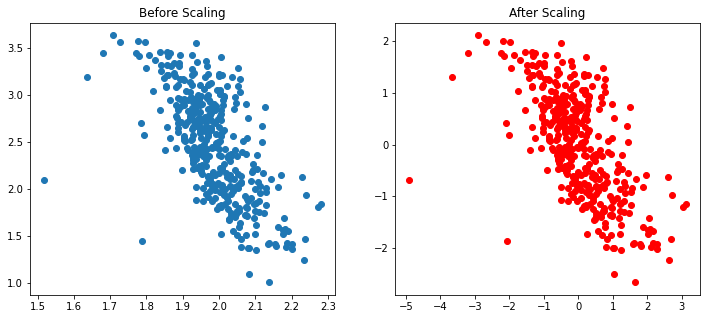

In [204]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['RM_transformed'],X_train['LSTAT_transformed'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled[:,0], X_train_scaled[:,1],color='red')
ax2.set_title("After Scaling")
plt.show()

In [205]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [206]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [207]:
y_pred = lr.predict(X_test_scaled)

### Checking the R2 score

In [208]:
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.6062826024633405


# Checking the score using Cross Validation

In [209]:
rig = LinearRegression(normalize=True)

In [210]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rig, bos[['RM','LSTAT']], bos['TARGET'], cv=5, scoring = 'r2' )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names 

In [211]:
scores

array([ 0.65864407,  0.68175316,  0.4026017 ,  0.1817464 , -0.37691789])

In [212]:
scores.mean()

0.3095654873541598

In [213]:
print("R2 score without feature engineering: ",r2_score(y_test1,y_pred1))
print("R2 score with feature engineering: ",r2_score(y_test,y_pred))

R2 score without feature engineering:  -24.888445355878083
R2 score with feature engineering:  0.6062826024633405


 Note
- By seeing the cross_val_score we can see that Linear regression is not so effective for this data set
- R2 score after feature engineerig we got 0.59 R2 score